In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Hello Amil. Ive taken the code from week 3's lab and applied it to your project. This is a good starting point for your midterm on monday. 
# This reads the csv and passes an additional argument that converts the 'Fips' column to string format. 

df = pd.read_csv(
    'age_and_sex_Data.csv',
    dtype=
    {
        'Fips':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [4]:
# This creates a combined ages columns of from ages 20-34 I belive. You should double check using the meta data file

df["Age_Combined"] = df[["S0101_C01_006E", "S0101_C01_007E", "S0101_C01_008E"]].sum(axis=1)


In [5]:
# cleans up the data, only keeping what we need. You can edit this and include whatever you think is relevent. 
columns_to_keep = ['Fips',
                   'S0101_C01_006E',
                   'S0101_C01_007E','S0101_C01_008E',
                   'S0101_C01_001E', "Age_Combined"]
df2 = df[columns_to_keep]

In [6]:
# listing the columns so I can just copy and paste them in the cell below and then rename them. 
columns = list(df2)
columns

['Fips',
 'S0101_C01_006E',
 'S0101_C01_007E',
 'S0101_C01_008E',
 'S0101_C01_001E',
 'Age_Combined']

In [7]:
# rename
df2.columns = ['Fips', "Age 20-24", "Age 25-29", "Age 30-34","Total Population", 'Age_Combined']

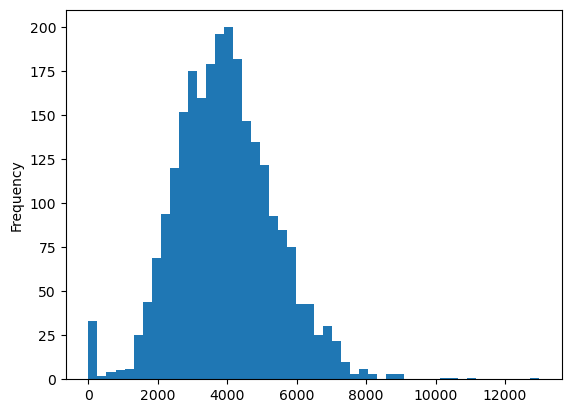

In [8]:
# plot, putting plt.show to show the plot
df2["Total Population"].plot.hist(bins=50)
plt.show()

In [9]:
# sorting from largest to smallest. You could change this to 'Age_Combined'
df_sorted = df2.sort_values(by='Total Population',ascending = False)

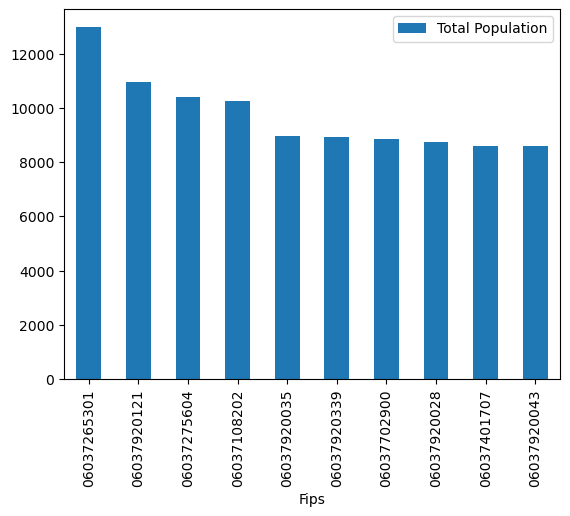

In [10]:
# top ten fips codes with the larges total population
df_sorted.head(10).plot.bar(x='Fips',
                            y='Total Population')
plt.show()

In [11]:
# Importing census tract file with a geometry column. This is what we are going to use to geocode your date. We are gonna 
# merge these two data sets based on a the 'FIPS' columns
tracts=gpd.read_file('Census_Tracts_2020.geojson')

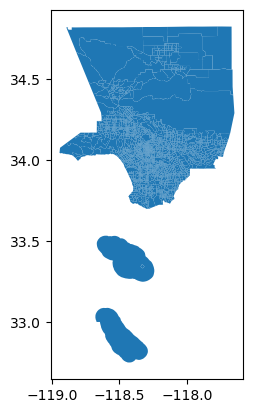

In [12]:
# plot it first, not necessary but jsut to check its the right tracts
tracts.plot()
plt.show()

In [13]:
# filtering only the columns that we need
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [14]:
# create a FIPS column in thise new data set that were gonna merge with the orignal. The ct20 is the same as the Fips but is 
# mussin a 06037 code in front which is for los angels. So we are gonna ad it. 
tracts['Fips'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
# merging them 
tracts_age = tracts.merge(df2,on="Fips")

In [16]:
# check it out...ayee now we have a geometry column
tracts_age.head()

,CT20,geometry,Fips,Age 20-24,Age 25-29,Age 30-34,Total Population,Age_Combined
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,243,256,144,4152,643
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,200,134,198,4198,532
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220,197,166,292,3434,655
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,208,264,231,3931,703
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,220,256,176,2572,652


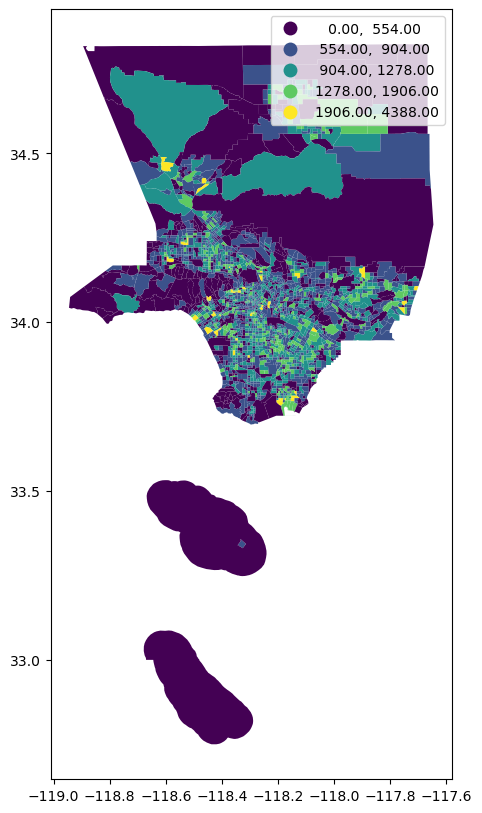

In [17]:
# from here we can create maps both static using matplot.lib and interactive using folium. 
tracts_age.plot(figsize=(12,10),
                 column='Age_Combined',
                 legend=True, 
                 scheme='NaturalBreaks')
plt.show()

In [18]:
# create a pertage of total population that is 20 - 34 year old
tracts_age['PCT_20_to_34'] = tracts_age['Age_Combined']/tracts_age['Total Population']*100


<Axes: >

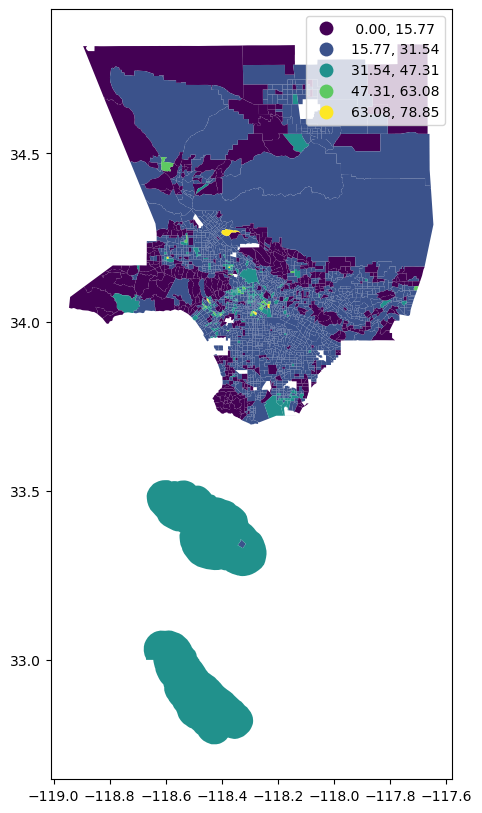

In [19]:
# plot it
tracts_age.plot(figsize=(12,10),
                 column='PCT_20_to_34',
                 legend=True, 
                 scheme='equal_interval')

In [20]:
import folium

In [21]:
# interavtive map

m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_age, # geo data
                  data=tracts_age, # data          
                  key_on='feature.properties.Fips', # key, or merge column
                  columns=['Fips', 'PCT_20_to_34'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population ages 20 to 34 years old').add_to(m)    # name on the legend color bar
m

m.save('tracts_age.html')

NameError: name 'la_income' is not defined

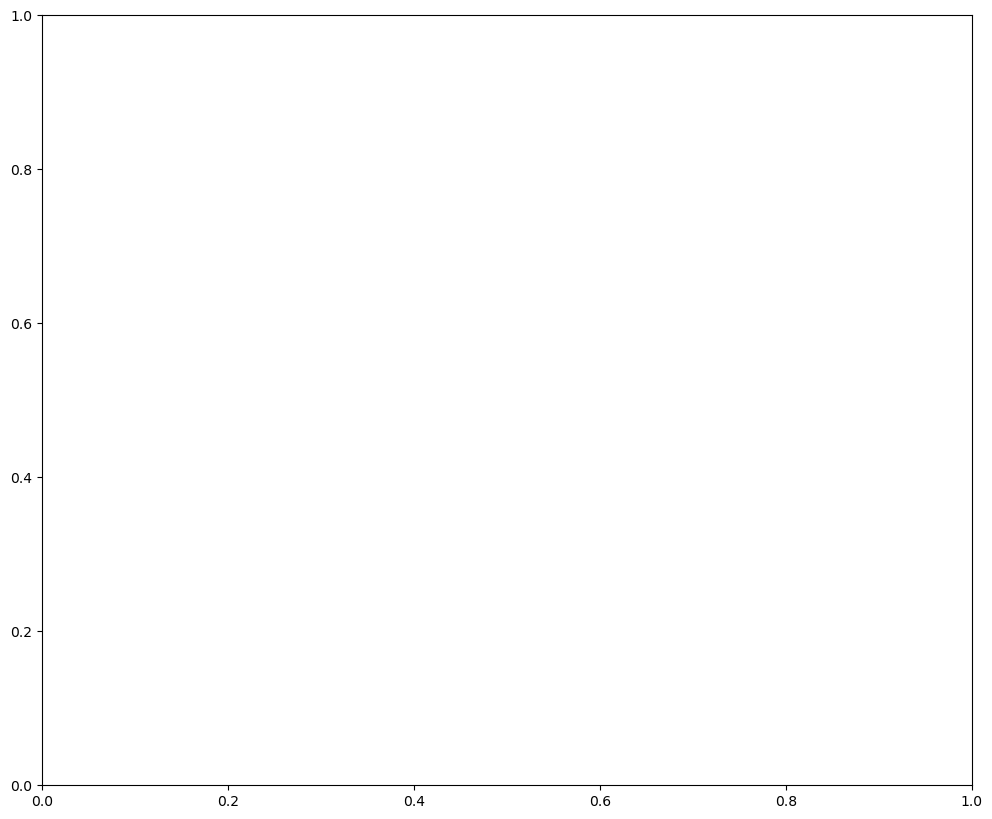

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
la_income.plot(ax=ax, column='Median Household Income', legend=True, cmap='PuRd',
               legend_kwds={'label': "Median Household Income", 'orientation': "vertical"})
Ln.plot(ax=ax, color='red', markersize=5)
ax.axis('off')
ax.set_title('Median Household Income in the City of Los Angeles')


In [ ]:
import matplotlib.pyplot as plt

# Correctly creating the plot with specified figure size
fig, ax = plt.subplots(figsize=(20,20))  # 'figsize' is used here correctly
tracts_age.plot(ax=ax, column='Age_Combined', legend=True, cmap='PuRd',
                legend_kwds={'label': "Median Household Income", 'orientation': "vertical", 'shrink': 0.5})

# Accessing the colorbar correctly and modifying it
cbar = fig.axes[1]  # This should be consistent with your earlier code. You referenced it as 'bar', but it's generally 'fig.axes[1]'
cbar.set_label('Median Household Income', fontsize=10)  # Set an appropriate font size
cbar.ax.tick_params(labelsize=8)  # Set fontsize for the ticks

# Adjusting plot aspects and layout
ax.set_aspect('equal')  # This helps maintain the aspect ratio of the map
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Adjust spacing to give more room
ax.axis('off')  # Hides the axis
ax.set_title('Median Household Income in the City of Los Angeles', fontsize=12)  # Adjust title font size if necessary

plt.show()
